In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as sps
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from scipy.optimize import minimize_scalar
import statistics as stats

sns.set_theme(style='white')

In [3]:
def mapFeature(A,n):
    if (len(A.columns) > 1) and n > 1:    
        B = A.copy()
        m = len(A.iloc[:,:-1].columns)
        for i in range(2,n+1):
            for each in list(sums(m,i)):
                B.insert(loc = len(B.columns)-1 ,column = str(each) ,value = combi_val(each,A.iloc[:,:-1]))
        return B
    else :
        return A 

In [4]:
def sums(length, total_sum):
    if length == 1:
        yield (total_sum,)
    else:
        for value in range(total_sum + 1):
            for permutation in sums(length - 1, total_sum - value):
                yield (value,) + permutation

In [5]:
def combi_val(vals,df):
    result=1
    for each in range(len(df.columns)):
        result = result*(df.iloc[:,each]**vals[each])
    return pd.DataFrame(result)

In [6]:
#Logistic Regression Model

In [7]:
#Loading Training Data
data = pd.read_csv('../input/titanic/train.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
#Choosing Relevant Features:
x = data[['Pclass','Sex','Age','SibSp','Parch','Cabin']]

#Converting Sex Labels to 0/1:
x = x.assign( Sex = preprocessing.LabelEncoder().fit_transform(x['Sex']) )

In [9]:
#Filling Missing Age Values With Mean Of Groups Of Similar Individuals:
x['Age'] = x.apply(lambda row: (x[ (x['Pclass'] == row['Pclass']) & (x['Sex'] == row['Sex']) & (x['SibSp']+x['Parch'] == row['SibSp']+row['Parch']) ]['Age']).mean() if np.isnan(row['Age']) else row['Age'],axis=1)


#Converting Cabin Labels to 0/1 Based On Values Being Missing Or Present:
x['Cabin'] = x.apply(lambda row: 0 if pd.isnull(row['Cabin']) else 1,axis=1)


In [10]:
#Removing Rows That Couldn't Be Approximated:
x.dropna(inplace=True)
y = data[data.index.isin(x.index)]['Survived']

In [11]:
#Using A Funtion To Generate Exponential And Multiplicative Factors:
X = mapFeature(x,2)

#Splittinng Data:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
#Optimising Parameter C For Logistic Regression Using Zero-One Classification Loss:


# def f(x):
#     return skm.zero_one_loss(y_test, linear_model.LogisticRegression(penalty='l2',C=x,solver = 'lbfgs',max_iter=10000).fit(X_train, y_train).predict(X_test))
# L=[]
# for i in range(10):
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#     res = minimize_scalar(f, bounds=(0.00001,100000), method='bounded')
#     L.append(res.x)
# stats.mean(L)

In [13]:
#Training Logistic Regression Model:
LRG = linear_model.LogisticRegression(penalty='l2',C=86300,solver = 'lbfgs',max_iter=10000).fit(X_train, y_train)
LRG.score(X_test,y_test)

0.8305084745762712

0.8138148667601683

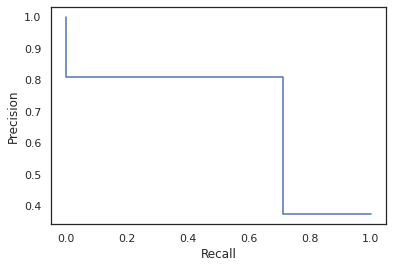

In [14]:
#Precison Recall and F1 Score:
precision, recall, _ = skm.precision_recall_curve(y_test, LRG.predict(X_test))
disp = skm.PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
skm.precision_recall_fscore_support(y_test,LRG.predict(X_test), average='macro')[2]

In [15]:
# vis = []
# for i in list(range(1,21))*100:
#     LRG = linear_model.LogisticRegression(penalty='l2',C=i,solver = 'lbfgs',max_iter=10000).fit(X_train, y_train)
#     vis.append([i,LRG.score(X_test,y_test)])
# pd.DataFrame(vis)[1].plot()

In [16]:
# results = []
# for i in np.geomspace(1,200,50):
#   for n in range(3):
#     avg = []
#     X = mapFeature(x,n)
#     avg = []
#     for j in range(11):
#         X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#         L = []
#         LRG = linear_model.LogisticRegression(penalty='l2',C=i,solver = 'lbfgs',max_iter=5000).fit(X_train, y_train)
#         avg.append(LRG.score(X_test,y_test))
#     results.append([n,i,np.mean(avg)])
    
# results = pd.DataFrame(results,columns=['degree','alpha','mean error'])
# x = np.array(results['degree'])
# y = np.array(results['alpha'])
# z = np.array(results['mean error'])
# offset = 1.25
# xmin = x.min()
# xmax = x.max()+offset
# ymin = y.min()
# ymax = y.max()+offset

# X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
# positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([x, y])
# kernel = sps.gaussian_kde(values, weights=z)
# Z = np.reshape(kernel(positions).T, X.shape)

# fig, ax = plt.subplots(figsize=(20, 10))
# light_jet = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.jet)

# ax.imshow(np.rot90(Z),cmap=plt.cm.jet,extent=[xmin, xmax, ymin, ymax],aspect='auto')
# sns.scatterplot(data=results,x='degree', y='alpha',size='mean error',color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.show()

In [17]:
#Loading Test Data:
test = pd.read_csv('../input/titanic/test.csv',index_col='PassengerId')
test['Fam'] = test['SibSp'] + test['Parch']
test_data = test[['Pclass','Sex','Age','SibSp','Parch','Cabin']]
test_data = test_data.assign( Sex = preprocessing.LabelEncoder().fit_transform(test_data['Sex']) )

In [18]:
#Populating Missing Age Values (As Was Done During Training):
test_data['Age'] = test_data.apply(lambda row: (x[(x['Pclass'] == row['Pclass']) & (x['Sex'] == row['Sex']) & (x['SibSp']+x['Parch'] == row['SibSp']+row['Parch']) ]['Age']).mean() if np.isnan(row['Age']) else row['Age'],axis=1)

test_data['Cabin'] = x.apply(lambda row: 0 if pd.isnull(row['Cabin']) else 1,axis=1)

In [19]:
#Observed Outliers In Dataset During Exploratory Analysis:
sage = test_data[test_data['Age'].isnull()]

In [20]:
#Populating Empty Age Values:
test_data.fillna(0,inplace=True)

In [21]:
#Computing Predection On Test Data
result = pd.DataFrame(LRG.predict(mapFeature(test_data,2)),index=test_data.index,columns=['Survived'])

In [22]:
#Manually Assigning Values To Observed Outliers In Data:
result[result.index.isin(sage.index)]['Survived'].values[:] = 0

In [23]:
#Saving Result
result.to_csv('submission.csv')